In [134]:
#import required libraries|
import os
import pandas as pd
import numpy as np
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline
import time

In [135]:
def transform_col(ser):
    arr = np.array(ser).reshape(-1,1)
    return(arr)


def get_title(filePath):
    fileName = filePath.split('.')[0]
    titleName = fileName[-5:] 
    title = 'Magnets : {} , Distance from magnet {} cm'.format(titleName[0], titleName.split('_')[1])
    saveFile = 'Viz1/' + titleName + '.jpg'
    return(titleName, title, saveFile)
 
    
def get_cols(df):
    col1  = transform_col(df.loc[0])
    col2 = transform_col(df.loc[1])
    col1_2 = np.hstack((col1,col2))

    columns = [str(a) + '_' + (b) for a,b in col1_2[:-1]]
    columns.append('drop_column')
    return columns

def get_resultant(filePath):
    filePath = filePath
    df = pd.read_csv(filePath, sep = '\t')
    columns = get_cols(df)
    df = df[3:]
    df.columns = columns
    
    x = df['Mag_X_CAL'].astype('float')
    y = df['Mag_Y_CAL'].astype('float')
    z = df['Mag_Z_CAL'].astype('float')
    resultant = np.sqrt(np.square(x)+np.square(y)+np.square(z))

    return(resultant)

In [142]:
def plot_Visualize_individual(filePath):
    
    plt.figure(figsize = (20,10))
    
    y_data = get_resultant(filePath)
    x_data = np.linspace(0,int(len(y_data)/100), len(y_data))
            
    plt.plot(x_data, y_data)
    
    _, title, saveFile = get_title(filePath)
    plt.title(title, fontsize=25)
    plt.xlabel('Time (seconds)', fontsize=15)
    plt.ylabel('Flux intensity', fontsize=15)
    plt.savefig(saveFile)
    plt.show()

    time.sleep(1)
    clear_output(wait=True)
    
    
def Visualize_1(PATH = 'stride_length'):
    for file in os.listdir(PATH):
        
        filePath = os.path.join(PATH, file)
        plot_Visualize_individual(filePath)

In [143]:
def plot_Visualize_group(fileNameDict):
    #print(fileNameDict)
    for magnet, files in fileNameDict.items():
        #print(fileNameDict)
        #Declare no of subplots
        fig, axs = plt.subplots(len(files), 1, sharex=True)
        fig.subplots_adjust(hspace=0)
        
        fig.set_size_inches((15,20))
        files = np.sort(files)
        for i,file in enumerate(files):
            titleName,_,_ = get_title(file)
            
            y_data = get_resultant(file)
            x_data = np.linspace(0,int(len(y_data)/100), len(y_data))
            
            if titleName[1]=='M':
                label = titleName[-2:] + 'cm'
                title = 'Magnets : {} , Distance : {} cm'.format(titleName[0], TitleName[-2:])
            else:
                label = 'Long Steps (75-90 cm)' if titleName[-2:]=='LO' else 'Short Steps (30 cm)'
                title = '' 
                       
            axs[i].plot(x_data,y_data,color='#1f78b4', label = label)
            axs[i].legend()
            
        axs[i].set_xlabel('time in (seconds)', font = 18)
        
        savePath = os.path.join('Viz2', titleName[:2] + '.jpg')
        plt.savefig(savePath)
    

    plt.rcParams.update({'font.size': 10})
    plt.show()   
        
        
def Visualize_2(PATH = 'stride_length'):
    fileNameDict = dict()
    files = os.listdir(PATH)
    
    for file in files:
        filePath = os.path.join(PATH, file)
        titleName,_,_ = get_title(filePath)
        
        if titleName[:2] not in fileNameDict.keys():
            fileNameDict[titleName[:2]] = list()
        fileNameDict[titleName[:2]].append(filePath)
        
    plot_Visualize_group(fileNameDict)

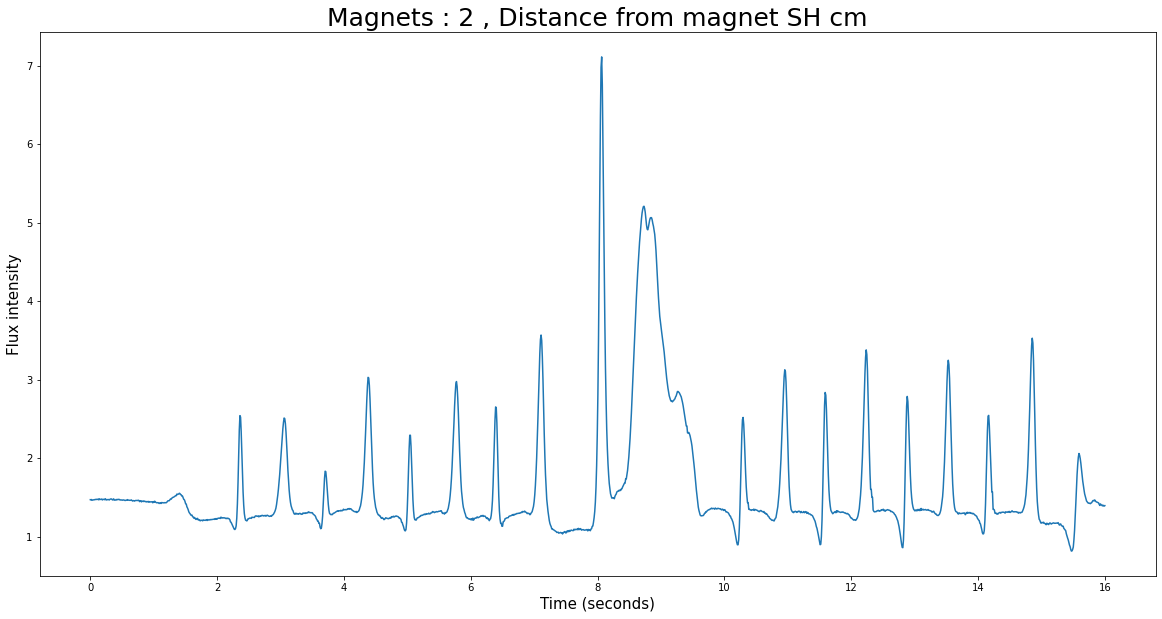

In [144]:
fileNameDict = Visualize_1()